In [5]:
# Modul - 3
# M3 T01: Exercicis de training i test sets
# Exercici - 1
# Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
# Exercici 2
# Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

from pandas import read_csv
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
url = 'archive/DelayedFlights.csv'
dataframe = read_csv(url)
# print (dataframe.head())

data = dataframe.loc[:1000,['FlightNum', 'Year', 'Month', 'DayofMonth', 'DepTime', 'ArrTime', 'DepDelay', 'ArrDelay', 'LateAircraftDelay']].values
print(data)

X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# Dedes de proves Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Estandarizació i escalat Train
print("Dades Train/n")
print(Counter(y_train))

scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler)

X_scaled = scaler.transform(X_train)
print (X_scaled)

X_scaled.mean(axis=0)
print (X_scaled)

# Estandarizació i escalat Test
print("Dades Test/n")
print(Counter(y_test))

scaler = preprocessing.StandardScaler().fit(X_test)
print(scaler)

X_scaled = scaler.transform(X_test)
print (X_scaled)

X_scaled.mean(axis=0)
print (X_scaled)


[[ 3.350e+02  2.008e+03  1.000e+00 ...  8.000e+00 -1.400e+01        nan]
 [ 3.231e+03  2.008e+03  1.000e+00 ...  1.900e+01  2.000e+00        nan]
 [ 4.480e+02  2.008e+03  1.000e+00 ...  8.000e+00  1.400e+01        nan]
 ...
 [ 9.570e+02  2.008e+03  1.000e+00 ...  2.600e+01  2.600e+01  2.500e+01]
 [ 2.613e+03  2.008e+03  1.000e+00 ...  8.000e+00  7.000e+00        nan]
 [ 2.871e+03  2.008e+03  1.000e+00 ...  2.200e+01  1.300e+01        nan]]
(1001, 8) (1001,)
(670, 8) (331, 8) (670,) (331,)
Dades Train/n
Counter({0.0: 67, 9.0: 14, 20.0: 13, 25.0: 12, 24.0: 11, 29.0: 10, 8.0: 10, 14.0: 10, 11.0: 10, 18.0: 10, 12.0: 10, 22.0: 9, 4.0: 9, 13.0: 9, 3.0: 9, 33.0: 8, 16.0: 8, 39.0: 8, 15.0: 8, 19.0: 7, 10.0: 7, 47.0: 6, 7.0: 6, 31.0: 6, 28.0: 6, 5.0: 6, 41.0: 5, 30.0: 5, 6.0: 5, 27.0: 5, 17.0: 5, 26.0: 5, 23.0: 5, 1.0: 5, 62.0: 4, 42.0: 4, 21.0: 4, 35.0: 4, 87.0: 3, 52.0: 3, 56.0: 3, 58.0: 3, 65.0: 3, 40.0: 3, 44.0: 3, 32.0: 3, 43.0: 3, 50.0: 3, 102.0: 2, 46.0: 2, 38.0: 2, 74.0: 2, 53.0: 2, 59.

Accuracy: 1.000


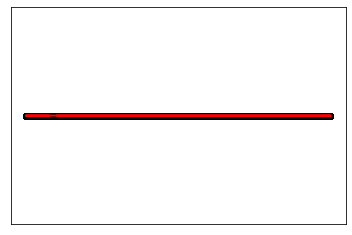

In [7]:
# Exercici 3
# Resumeix les noves columnes generades de manera estadística i gràfica

import matplotlib.pyplot as plt
from pandas import read_csv
from collections import Counter
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

url = 'archive/DelayedFlights.csv'
dataframe = read_csv(url)

data1 = dataframe.loc[:10000,['FlightNum', 'Year']].values

X, y = data1[:, :-1], data1[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Creem el model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# Fem la prediccio
y_predict_test = model.predict(X_test)
# Evaluem prediccio
acc = accuracy_score(y_test, y_predict_test)
print('Accuracy: %.3f' % acc)

model = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Grafic
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()